## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64], kernel_regularizer=l2(1e-4)):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=kernel_regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=kernel_regularizer)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 2048 # 256
MOMENTUM = 0.95
REGULARIZERS = {
    'l1 (0.01)': l1(1e-2),
    'l1 (0.0001)': l1(1e-4),
    'l2 (0.01)': l2(1e-2),
    'l2 (0.0001)': l2(1e-4),
    'l1_l2 (0.01)': l1_l2(1e-2),
    'l1_l2 (0.0001)': l1_l2(1e-4),
}

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for key in REGULARIZERS.keys():
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with %s" % (key))
    model = build_mlp(input_shape=x_train.shape[1:], kernel_regularizer=REGULARIZERS[key])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-%s" % str(key)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with l1 (0.01)


W0715 23:02:20.529602 12140 deprecation.py:323] From C:\Users\qwerz\Miniconda3\envs\ML100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 52us/sampl

50000/50000 [==============================] - 2s 42us/sample - loss: 2.3788 - accuracy: 0.1000 - val_loss: 2.3787 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.3788 - accuracy: 0.1000 - val_loss: 2.3788 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 42us/sample - loss: 2.3788 - accuracy: 0.1000 - val_loss: 2.3788 - val_accuracy: 0.1000
Experiment with l1 (0.0001)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________

50000/50000 [==============================] - 2s 40us/sample - loss: 3.3819 - accuracy: 0.4403 - val_loss: 3.3914 - val_accuracy: 0.4327
Epoch 46/50
50000/50000 [==============================] - 2s 39us/sample - loss: 3.3733 - accuracy: 0.4425 - val_loss: 3.3848 - val_accuracy: 0.4336
Epoch 47/50
50000/50000 [==============================] - 2s 40us/sample - loss: 3.3653 - accuracy: 0.4426 - val_loss: 3.3766 - val_accuracy: 0.4357
Epoch 48/50
50000/50000 [==============================] - 2s 41us/sample - loss: 3.3570 - accuracy: 0.4457 - val_loss: 3.3692 - val_accuracy: 0.4337
Epoch 49/50
50000/50000 [==============================] - 2s 39us/sample - loss: 3.3485 - accuracy: 0.4455 - val_loss: 3.3613 - val_accuracy: 0.4379
Epoch 50/50
50000/50000 [==============================] - 2s 40us/sample - loss: 3.3409 - accuracy: 0.4471 - val_loss: 3.3538 - val_accuracy: 0.4386
Experiment with l2 (0.01)
Model: "model"
_________________________________________________________________
Layer

50000/50000 [==============================] - 2s 39us/sample - loss: 5.0003 - accuracy: 0.4082 - val_loss: 4.9683 - val_accuracy: 0.4085
Epoch 43/50
50000/50000 [==============================] - 2s 39us/sample - loss: 4.9350 - accuracy: 0.4102 - val_loss: 4.9043 - val_accuracy: 0.4124
Epoch 44/50
50000/50000 [==============================] - 2s 39us/sample - loss: 4.8708 - accuracy: 0.4110 - val_loss: 4.8406 - val_accuracy: 0.4123
Epoch 45/50
50000/50000 [==============================] - 2s 39us/sample - loss: 4.8080 - accuracy: 0.4125 - val_loss: 4.7782 - val_accuracy: 0.4128
Epoch 46/50
50000/50000 [==============================] - 2s 39us/sample - loss: 4.7466 - accuracy: 0.4140 - val_loss: 4.7174 - val_accuracy: 0.4141
Epoch 47/50
50000/50000 [==============================] - 2s 39us/sample - loss: 4.6861 - accuracy: 0.4150 - val_loss: 4.6593 - val_accuracy: 0.4120
Epoch 48/50
50000/50000 [==============================] - 2s 39us/sample - loss: 4.6273 - accuracy: 0.4157 - va

50000/50000 [==============================] - 2s 39us/sample - loss: 1.7141 - accuracy: 0.4230 - val_loss: 1.7190 - val_accuracy: 0.4268
Epoch 40/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7087 - accuracy: 0.4256 - val_loss: 1.7141 - val_accuracy: 0.4249
Epoch 41/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.7036 - accuracy: 0.4277 - val_loss: 1.7109 - val_accuracy: 0.4277
Epoch 42/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.6988 - accuracy: 0.4278 - val_loss: 1.7053 - val_accuracy: 0.4291
Epoch 43/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6936 - accuracy: 0.4302 - val_loss: 1.7001 - val_accuracy: 0.4297
Epoch 44/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6882 - accuracy: 0.4323 - val_loss: 1.6992 - val_accuracy: 0.4291
Epoch 45/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.6839 - accuracy: 0.4342 - va

50000/50000 [==============================] - 2s 41us/sample - loss: 2.3787 - accuracy: 0.1000 - val_loss: 2.3787 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 2s 42us/sample - loss: 2.3787 - accuracy: 0.0995 - val_loss: 2.3787 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 2s 41us/sample - loss: 2.3787 - accuracy: 0.1000 - val_loss: 2.3788 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 2s 41us/sample - loss: 2.3787 - accuracy: 0.1000 - val_loss: 2.3787 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 2s 40us/sample - loss: 2.3787 - accuracy: 0.0986 - val_loss: 2.3787 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 2s 41us/sample - loss: 2.3787 - accuracy: 0.0986 - val_loss: 2.3787 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 2s 40us/sample - loss: 2.3787 - accuracy: 0.0986 - va

50000/50000 [==============================] - 2s 41us/sample - loss: 6.5891 - accuracy: 0.4001 - val_loss: 6.5364 - val_accuracy: 0.4003
Epoch 34/50
50000/50000 [==============================] - 2s 41us/sample - loss: 6.4886 - accuracy: 0.4001 - val_loss: 6.4378 - val_accuracy: 0.3978
Epoch 35/50
50000/50000 [==============================] - 2s 41us/sample - loss: 6.3909 - accuracy: 0.4006 - val_loss: 6.3407 - val_accuracy: 0.4026
Epoch 36/50
50000/50000 [==============================] - 2s 41us/sample - loss: 6.2947 - accuracy: 0.4024 - val_loss: 6.2457 - val_accuracy: 0.4025
Epoch 37/50
50000/50000 [==============================] - 2s 41us/sample - loss: 6.2008 - accuracy: 0.4035 - val_loss: 6.1528 - val_accuracy: 0.4012
Epoch 38/50
50000/50000 [==============================] - 2s 41us/sample - loss: 6.1086 - accuracy: 0.4040 - val_loss: 6.0611 - val_accuracy: 0.4044
Epoch 39/50
50000/50000 [==============================] - 2s 42us/sample - loss: 6.0183 - accuracy: 0.4049 - va

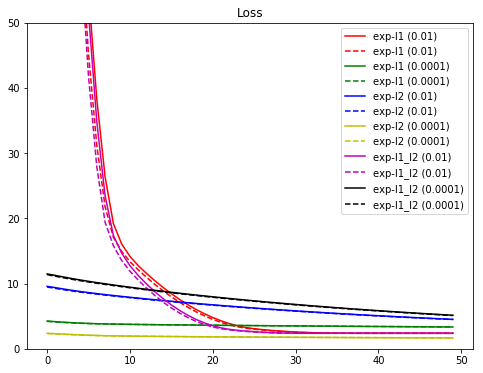

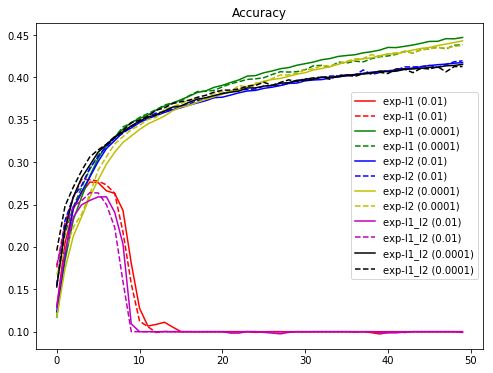

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 50])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()